In [1]:
"""
Arjun Srivastava
arj1
AMATH 301 B
"""

import matplotlib.pyplot as plt
import numpy as np

In [28]:
# Problem 1

# Function to simulate sigma sum
def sigma(start, stop, interval):
    res = 0
    for i in range(start, stop + 1):
        res += interval
    return res

# a)

x1 = sigma(1, 2500000000, .1)
x2 = sigma(1, 1250000000, .2)
x3 = sigma(1, 1000000000, .25)
x4 = sigma(1, 500000000, .5)

print('x1: ' + str(x1), 'x2: ' + str(x2), 'x3: ' + str(x3), 'x4: ' + str(x4), sep='\n')

"""
Warning: this cell takes a very long time to execute, so I have included the values as a comment for reference in the nexxt
few cells
out:
x1: 249999989.80472112
x2: 249999994.5106034
x3: 250000000.0
x4: 250000000.0
"""


In [35]:
# b)

y1 = abs(250000000 - x1)
y2 = abs(250000000 - x2)
y3 = abs(250000000 - x3)
y4 = abs(250000000 - x4)

# c)

difference = str(abs(y2-y1))
if y1 < y2:
    print('y2 is larger by ' + difference)
elif y2 < y1:
    print('y1 is larger by ' + difference)
else:
    print('They are equal')

"""
out: y1 is larger by 10.195278882980347

y1 is larger because its error is greater. x1 is farthest from its intended value. x1 was generated
by adding 2500000000 .1 times, meaning it had the most iterations out of all the x variables. This could be why it incurred
the most error
"""


# d)

print('y1: ' + str(y1), 'y2: ' + str(y2), 'y3: ' + str(y3), 'y4: ' + str(y4), sep='\n')

"""
out: 
y1: 10.195278882980347
y2: 5.4893966019153595
y3: 0.0
y4: 0.0

y3 and y4 are equal to zero
"""

# e)

"""
Since y3 and y4 are equal to 0, x1 and x2 must have more significant error. To better understand why this error is happening,
I considered the differences betweem .1, .2 and .25, .5. In x1 and x2, there are 2500000000 and 1250000000 iterations respectively,
both of which are higher than the iterations required for .25 (1000000000) and .5 (500000000). This leads me to believe that while there is
certainly rounding error in x3 and x4, there is a cutoff between .25 and .2's number of iterations where the rounding error becomes
greater than Python's limit of 10e16 decimal places. Thus, the error with x1 and x2 is significant enough to be noticed by Python
due to the number of iterations, but the error with x3 and x4 is not significant enough, leading to the seemingly accurate
values of y3 and y4.
"""

x1: 249999989.80472112
x2: 249999994.5106034
x3: 250000000.0
x4: 250000000.0
y1 is larger by 4.705882281064987
y1: 10.195278882980347
y2: 5.4893966019153595
y3: 0.0
y4: 0.0


'\n# out: \ny1: 10.195278882980347\ny2: 5.4893966019153595\ny3: 0.0\ny4: 0.0\n\ny3 and y4 are equal to zero. This means that \n'

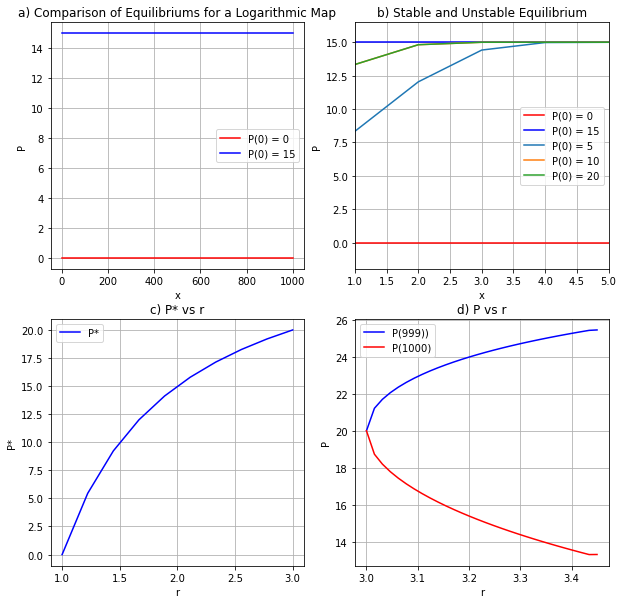

In [2]:
# Problem 2

# Computes a single log map iteration
def log_map(r, p, K):
    return r * p * (1 - p/K)

# Computes nth log map iteration
def calculate_log(n, r, p, K):
    for i in range(int(n)):
        p = log_map(r, p, K)
    return p

# Computes the nonzero equilibrium
def find_eq(r, K):
    return K - (K/r)

# a)

x = np.linspace(1,1000, 1000)
y = [calculate_log(i, 2, 0, 30) for i in x]  # Can I vectorize this function? Is there a better way besides the list comprehension?
y1 = [calculate_log(i, 2, 15, 30) for i in x]  # Can I vectorize this function?

fig1, axs = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
axs[0][0].plot(x, y, 'r')
axs[0][0].plot(x, y1, 'b')
axs[0][0].set_xlabel("x")
axs[0][0].set_ylabel("P")
axs[0][0].grid()
axs[0][0].set_title("a) Comparison of Equilibriums for a Logarithmic Map")
axs[0][0].legend(['P(0) = 0', 'P(0) = 15'])

"""
Both lines of the graph are horizontal, which makes sense given the definition of equilibrium. Both logarithmic functions
should not be growing, and the lines on the graph correctly illustrates this.
"""

# b)

y2 = [calculate_log(i, 2, 5, 30) for i in x]  # Can I vectorize this function? Is there a better way besides the list comprehension?
y3 = [calculate_log(i, 2, 10, 30) for i in x]  # Can I vectorize this function?
y4 = [calculate_log(i, 2, 20, 30) for i in x]

axs[0][1].set_xlim(1, 5)
axs[0][1].set_ylim(-2, 16.5)
axs[0][1].plot(x, y, 'r')
axs[0][1].plot(x, y1, 'b')
axs[0][1].plot(x, y2)
axs[0][1].plot(x, y3)
axs[0][1].plot(x, y4)
axs[0][1].set_xlabel("x")
axs[0][1].set_ylabel("P")
axs[0][1].grid()
axs[0][1].set_title("b) Stable and Unstable Equilibrium")
axs[0][1].legend(['P(0) = 0', 'P(0) = 15', 'P(0) = 5', 'P(0) = 10', 'P(0) = 20'])

"""
From these graphs, it is clear that P(0) = 0 is the unstable equilibrium, while P(0) = 15 is stable.
"""

# c)

rs = np.linspace(1, 3, 10)
y5 = [find_eq(r, 30) for r in rs]

axs[1][0].plot(rs, y5, 'b')
axs[1][0].set_xlabel("r")
axs[1][0].set_ylabel("P*")
axs[1][0].grid()
axs[1][0].set_title("c) P* vs r")
axs[1][0].legend(['P*'])

"""
The stable equilibriums for each value of r can be reasonably deduced just by looking at the graph:
r = 1, P* = 0
r = 1.5, P* = 10
r = 2, P* = 15 (Just like we discussed earlier in the problem)
r = 2.5, P* ~ 17.75
r = 3, P* = 20
"""

# d)

rs1 = np.linspace(3, 3.44949, 30)
y6 = [calculate_log(999, r, 10, 30) for r in rs1]
y7 = [calculate_log(1000, r, 10, 30) for r in rs1]

axs[1][1].plot(rs1, y6, 'b')
axs[1][1].plot(rs1, y7, 'r')
axs[1][1].set_xlabel("r")
axs[1][1].set_ylabel("P")
axs[1][1].grid()
axs[1][1].set_title("d) P vs r")
axs[1][1].legend(['P(999))', 'P(1000)'])



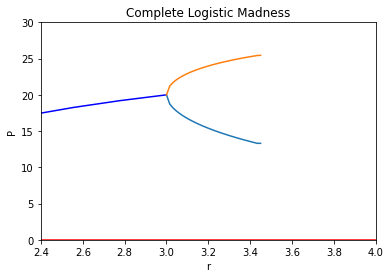

In [3]:
# e) attempted but not completed

fig2, ax = plt.subplots(1)
ax.set_title('Complete Logistic Madness')
ax.set_ylabel('P')
ax.set_xlabel('r')
ax.set_xlim(2.4,4)
ax.set_ylim(0,30)

ax.plot(rs, y5, 'b')
ax.plot(rs1, y7)
ax.plot(rs1, y6)
ax.plot(x, y, 'r')